### Homework assignment
`Class: IMPH4`

`Name: Le Thi Ngoc Anh`

#### Load data to Stata (version 15.1)

In [1]:
local datapath = "C:\Users\DELL\Dropbox\MPH_Assignment_Data_NormalTemp.xlsx"
import excel using `datapath', first clear
ren *, lower
descr






Contains data
  obs:           130                          
 vars:             3                          
 size:         1,300                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
temp            double  %10.0g                Temp
gender          byte    %10.0g                Gender
heart           byte    %10.0g                Heart
--------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.


#### 1. Is the distribution of body temperatures normal?



                            Temp
-------------------------------------------------------------
      Percentiles      Smallest
 1%         96.4           96.3
 5%           97           96.4
10%        97.25           96.7       Obs                 130
25%         97.8           96.7       Sum of Wgt.         130

50%         98.3                      Mean           98.24923
                        Largest       Std. Dev.      .7331832
75%         98.7           99.5
90%         99.1           99.9       Variance       .5375575
95%         99.3            100       Skewness       -.004368
99%          100          100.8       Kurtosis        3.70496

(bin=11, start=96.3, width=.40909091)


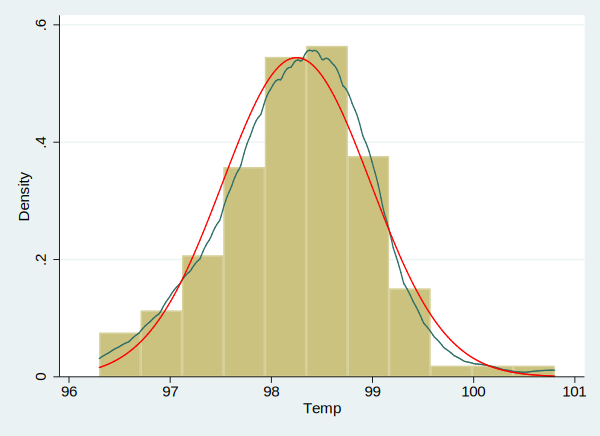

In [2]:
sum temp, detail
hist temp, normal kdensity normopts(lcolor(red))

<div class="alert-success">
   <h4> --> The distribution of body temperatures is normal </h4>
</div>

#### 2. Is the population mean really 98.6 degrees F/37 degrees C?

In [3]:
ttest temp==98.6


One-sample t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
    temp |     130    98.24923    .0643044    .7331832      98.122    98.37646
------------------------------------------------------------------------------
    mean = mean(temp)                                             t =  -5.4548
Ho: mean = 98.6                                  degrees of freedom =      129

   Ha: mean < 98.6             Ha: mean != 98.6               Ha: mean > 98.6
 Pr(T < t) = 0.0000         Pr(|T| > |t|) = 0.0000          Pr(T > t) = 1.0000


<h4 class="alert-success"> --> The population mean is not really 98.6 degrees F, p-value of ttest is significant </h4>

#### 3. At what temperature should we consider someone&#39;s temperature to be &quot;abnormal&quot;?

<h5>Cause temperature is normal distribution, outliers is consider when temperature is out of range mean ± 3sd</h5>

In [4]:
qui sum temp, d
qui set linesize 200
di "Less than: " r(mean)-3*r(sd) " degree F, or greater than: " r(mean)+3*r(sd) " is consider abnormal temperature"




Less than: 96.049681 degree F, or greater than: 100.44878 is consider abnormal temperature


#### 4. Is there a difference between males and females in normal temperature?

In [5]:
sdtest temp, by(gender)
if `r(p)' < 0.05 ttest temp, by(gender) unequal
else ttest  temp, by(gender)



Variance ratio test
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
       1 |      65    98.10462      .08667    .6987558    97.93147    98.27776
       2 |      65    98.39385    .0922183    .7434878    98.20962    98.57807
---------+--------------------------------------------------------------------
combined |     130    98.24923    .0643044    .7331832      98.122    98.37646
------------------------------------------------------------------------------
    ratio = sd(1) / sd(2)                                         f =   0.8833
Ho: ratio = 1                                    degrees of freedom =   64, 64

    Ha: ratio < 1               Ha: ratio != 1                 Ha: ratio > 1
  Pr(F < f) = 0.3105         2*Pr(F < f) = 0.6211           Pr(F > f) = 0.6895



Two-sample t test with equal

<h4 class="alert-success">
--> There is a difference between males and females in normal temperature
</h4>

#### 5. Is there a relationship between body temperature and heart rate?


(obs=130)

             |     temp    heart
-------------+------------------
        temp |   1.0000
       heart |   0.2537   1.0000


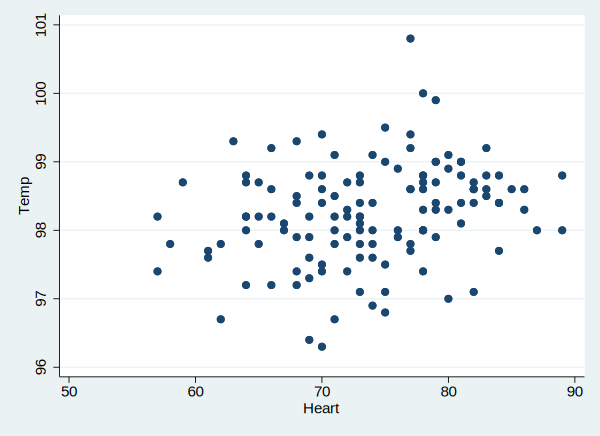

In [6]:
corr temp heart
scatter temp heart

<h4 class="alert-success">--> there is weak relationship between body temperature and heart beat with r=0.25</h4>

### --The end--